In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from retrosheet import get_batting_results as gbr
from retrosheet import score_value_matrix as svm

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [121]:
#打席情報
df = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/ichiro_2001-2019.csv', sep='\t')
print(df.shape)
df.head()

(10994, 19)


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,bat_lineup_id,event_tx,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,fld_cd,rbi_ct
0,OAK201406130,8,0,4,2,7,S15/G.3-H;1-2,suzui001,L,franj003,5,20,T,T,F,F,1,1,1
1,OAK201406140,3,0,0,0,7,13/G,suzui001,L,kazms001,0,2,T,T,F,F,0,1,0
2,OAK201406140,4,0,2,2,7,W,suzui001,L,kazms001,0,14,T,F,F,F,0,0,0
3,OAK201406140,7,0,0,0,7,31/G,suzui001,L,oterd001,0,2,T,T,F,F,0,3,0
4,OAK201406150,2,0,3,2,7,S7/G.1-2,suzui001,L,chavj001,1,20,T,T,F,F,1,7,0


In [122]:
#試合情報
df_games = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/games.csv', sep='\t')
print(df_games.shape)
df_games.head()

(46159, 15)


,game_dt,game_id,game_dy,away_team_id,home_team_id,away_score_ct,home_score_ct,park_id,attend_park_ct,minutes_game_ct,inn_ct,away_hits_ct,home_hits_ct,win_pit_id,lose_pit_id
0,20010401,TOR200104010,Sunday,TEX,TOR,1,8,SJU01,19891,194,9,9,13,loaie001,hellr001
1,20010402,BAL200104020,Monday,BOS,BAL,1,2,BAL12,46547,172,11,5,6,kohlr001,lowed001
2,20010402,CHN200104020,Monday,MON,CHN,5,4,CHI11,38466,207,10,10,9,lloyg001,fyhrm001
3,20010402,CIN200104020,Monday,ATL,CIN,10,4,CIN08,41901,187,9,14,8,valdm001,reyed001
4,20010402,CLE200104020,Monday,CHA,CLE,7,4,CLE08,42606,160,9,9,7,welld001,colob001


In [123]:
#プレイヤー情報
df_master = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/player_master.csv', sep=' ')
print(df_master.shape)
df_master.head()

(20093, 26)


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NaN,1981-12-27
2,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,2021-01-22,1934-02-05
3,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05
4,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN,1954-09-08
5,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,NaN,1972-08-25


    birthMonth  playerID
0          1.0      1722
1          2.0      1502
2          3.0      1607
3          4.0      1538
4          5.0      1542
5          6.0      1431
6          7.0      1596
7          8.0      1929
8          9.0      1755
9         10.0      1836
10        11.0      1697
11        12.0      1656


<BarContainer object of 12 artists>

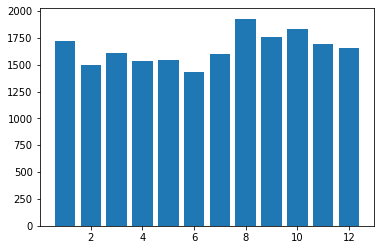

In [124]:
#誕生月別の選手数
tmp = df_master.groupby('birthMonth', as_index=False)['playerID'].count()
print(tmp)
tmp['playerID'].describe()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(tmp['birthMonth'], tmp['playerID'])

In [125]:
tmp['playerID'].describe()['std']

144.51137629539025

In [126]:
#ゲーム情報結合
print(df.shape)
df = pd.merge(df, df_games[['game_id', 'game_dt']], on='game_id')
print(df.shape)

df['game_dt'] = pd.to_datetime(df['game_dt'], format='%Y%m%d')
df['game_year'] = df['game_dt'].dt.strftime('%Y')

#日付とイニングで一意なID
df['game_dt_inn_id'] = df['game_dt'].dt.strftime('%Y%m%d') + df['inn_ct'].astype(str)

#プレイヤー情報結合
print(df.shape)
df = pd.merge(df, df_master[['retroID', 'birthYear']], left_on='bat_id', right_on='retroID')
print(df.shape)

#年齢
df['age'] = df['game_year'].astype(int) - df['birthYear']

#打席順にソート
df.sort_values(['game_dt', 'inn_ct', 'bat_home_id', 'outs_ct', 'inn_pa_ct'], inplace=True)

df.head()

(10994, 19)
(10994, 20)
(10994, 22)
(10994, 24)


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,bat_lineup_id,event_tx,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,fld_cd,rbi_ct,game_dt,game_year,game_dt_inn_id,retroID,birthYear,age
10239,SEA200104020,1,1,0,0,1,43/G,suzui001,L,hudst001,0,2,T,T,F,F,0,4,0,2001-04-02,2001,200104021,suzui001,1973.0,28.0
10240,SEA200104020,3,1,1,1,1,3/G,suzui001,L,hudst001,0,2,T,T,F,F,0,3,0,2001-04-02,2001,200104023,suzui001,1973.0,28.0
10241,SEA200104020,5,1,0,0,1,K,suzui001,L,hudst001,0,3,T,T,F,F,0,0,0,2001-04-02,2001,200104025,suzui001,1973.0,28.0
10242,SEA200104020,7,1,0,0,1,S8,suzui001,L,matht002,0,20,T,T,F,F,1,8,0,2001-04-02,2001,200104027,suzui001,1973.0,28.0
10243,SEA200104020,8,1,1,0,1,S1/BG1.1-3;B-2(E1/TH),suzui001,L,mecij001,1,20,T,T,F,T,1,1,0,2001-04-02,2001,200104028,suzui001,1973.0,28.0


### 打撃成績推移

In [127]:
#打撃成績の取得
df_results = pd.DataFrame()
for year in df['game_year'].unique():
    tmp = gbr(df[df['game_year']==year], 'suzui001')
    df_results = pd.concat([df_results, tmp], ignore_index=True)

print(df_results.shape)
df_results.head()

(10734, 41)


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,bat_lineup_id,event_tx,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,fld_cd,rbi_ct,game_dt,game_year,game_dt_inn_id,retroID,birthYear,age,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
0,SEA200104020,1,1,0,0,1,43/G,suzui001,L,hudst001,0,2,T,T,F,F,0,4,0,2001-04-02,2001,200104021,suzui001,1973.0,28.0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0
1,SEA200104020,3,1,1,1,1,3/G,suzui001,L,hudst001,0,2,T,T,F,F,0,3,0,2001-04-02,2001,200104023,suzui001,1973.0,28.0,2,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0
2,SEA200104020,5,1,0,0,1,K,suzui001,L,hudst001,0,3,T,T,F,F,0,0,0,2001-04-02,2001,200104025,suzui001,1973.0,28.0,3,0,0,0,0,0,0,0,0,0,0,1,0.00,0.00,0.00,0.0
3,SEA200104020,7,1,0,0,1,S8,suzui001,L,matht002,0,20,T,T,F,F,1,8,0,2001-04-02,2001,200104027,suzui001,1973.0,28.0,4,1,0,0,0,1,1,0,0,0,0,1,0.25,0.25,0.25,0.5
4,SEA200104020,8,1,1,0,1,S1/BG1.1-3;B-2(E1/TH),suzui001,L,mecij001,1,20,T,T,F,T,1,1,0,2001-04-02,2001,200104028,suzui001,1973.0,28.0,5,2,0,0,0,2,2,0,0,0,0,1,0.40,0.40,0.40,0.8


In [128]:
#シーズンごとに最終打席を取得
df_results_fin = df_results[df_results['game_dt_inn_id'].isin(df_results.groupby('game_year', as_index=False)['game_dt_inn_id'].max()['game_dt_inn_id'])]
df_results_fin

,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,bat_lineup_id,event_tx,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,fld_cd,rbi_ct,game_dt,game_year,game_dt_inn_id,retroID,birthYear,age,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
737,SEA200110070,8,1,1,1,1,K,suzui001,L,michc001,0,3,T,T,F,F,0,0,0,2001-10-07,2001,200110078,suzui001,1973.0,28.0,692,192,34,8,8,242,316,69,30,8,4,53,0.350,0.381,0.457,0.838
1465,ANA200209290,8,0,4,2,1,K,suzui001,L,lukam001,3,3,T,T,F,F,0,0,0,2002-09-29,2002,200209298,suzui001,1973.0,29.0,647,165,27,8,8,208,275,51,68,5,5,62,0.321,0.388,0.425,0.813
2190,SEA200309280,7,1,3,2,1,2/P2F,suzui001,L,hardr001,1,2,T,T,F,F,0,2,0,2003-09-28,2003,200309287,suzui001,1973.0,30.0,679,162,29,8,13,212,296,62,36,6,1,69,0.312,0.352,0.436,0.788
2952,SEA200410030,8,1,0,0,1,S8/L,suzui001,L,shoub001,0,20,T,T,F,F,1,8,0,2004-10-03,2004,200410038,suzui001,1973.0,31.0,704,225,24,5,8,262,320,60,49,4,3,63,0.372,0.414,0.455,0.869
3691,SEA200510020,8,1,2,2,1,K,suzui001,L,duchj001,0,3,T,T,F,F,0,0,0,2005-10-02,2005,200510028,suzui001,1973.0,32.0,679,158,21,12,15,206,296,68,48,4,6,66,0.303,0.350,0.436,0.786
4443,SEA200610010,8,1,0,0,1,K,suzui001,L,franf001,0,3,T,T,F,F,0,0,0,2006-10-01,2006,200610018,suzui001,1973.0,33.0,695,186,20,9,9,224,289,49,49,5,2,71,0.322,0.370,0.416,0.786
5179,SEA200709300,7,1,1,1,1,43/G,suzui001,L,mendl001,0,2,T,T,F,F,0,4,0,2007-09-30,2007,200709307,suzui001,1973.0,34.0,678,203,22,7,6,238,292,68,49,3,2,77,0.351,0.396,0.431,0.827
5928,SEA200809280,7,1,0,0,1,S6/G,suzui001,L,blevj001,0,20,T,T,F,F,1,6,0,2008-09-28,2008,200809287,suzui001,1973.0,35.0,686,180,20,7,6,213,265,42,51,5,4,65,0.310,0.361,0.386,0.747
6606,SEA200910040,7,1,2,1,1,K,suzui001,L,odayd001,2,3,T,T,F,F,0,0,0,2009-10-04,2009,200910047,suzui001,1973.0,36.0,639,179,31,4,11,225,297,46,32,4,1,71,0.352,0.386,0.465,0.851
7338,SEA201010030,9,1,3,2,1,7/F,suzui001,L,bresc001,2,2,T,T,F,F,0,7,0,2010-10-03,2010,201010039,suzui001,1973.0,37.0,680,175,30,3,6,214,268,43,45,3,1,86,0.315,0.359,0.394,0.753


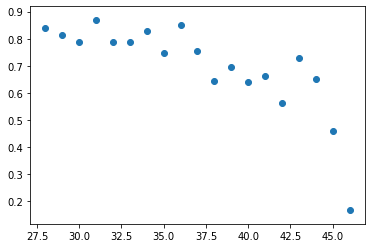

In [130]:
#OPS推移（イチロー）
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df_results_fin['age'], df_results_fin['ops'])

In [136]:
df_results_fin['ab_cum'].sum()

9934

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


def get_batting_results(df):
    #進塁イベントを除く
    df_res = df[(df['bat_event_fl']=='T')]
    
    #打席数
    
    #打数
    df_res['ab_cum'] = df_res['ab_fl'].replace({'T': 1, 'F': 0})
    df_res['ab_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['ab_cum'].cumsum()
    
    #single
    df_res['single_cum'] = 0
    df_res.loc[df_res['h_cd']==1, 'single_cum'] = 1
    df_res['single_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['single_cum'].cumsum()
     
    #double
    df_res['double_cum'] = 0
    df_res.loc[df_res['h_cd']==2, 'double_cum'] = 1
    df_res['double_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['double_cum'].cumsum()
    
    #triple
    df_res['triple_cum'] = 0
    df_res.loc[df_res['h_cd']==3, 'triple_cum'] = 1
    df_res['triple_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['triple_cum'].cumsum()
    
    #homerun
    df_res['homerun_cum'] = 0
    df_res.loc[df_res['h_cd']==4, 'homerun_cum'] = 1
    df_res['homerun_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['homerun_cum'].cumsum()
    
    #安打数
    df_res['hit_cum'] = df_res['single_cum'] + df_res['double_cum'] + df_res['triple_cum'] + df_res['homerun_cum']
     
    #塁打
    df_res['base_hit_cum'] = df_res['single_cum']*1 + df_res['double_cum']*2 + df_res['triple_cum']*3 + df_res['homerun_cum']*4
    
    #打点
    df_res['rbi_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['rbi_ct'].cumsum()
    
    #四球
    df_res['walk_cum'] = 0
    df_res.loc[df_res['event_cd'].isin([14, 15]), 'walk_cum'] = 1
    df_res['walk_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['walk_cum'].cumsum()
    
    #死球
    df_res['dead_cum'] = 0
    df_res.loc[df_res['event_cd'].isin([16]), 'dead_cum'] = 1
    df_res['dead_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['dead_cum'].cumsum()
    
    #犠飛
    df_res['sf_cum'] = df_res['sf_fl'].replace({'T': 1, 'F': 0})
    df_res['sf_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['sf_cum'].cumsum()
    
    #三振
    df_res['stout_cum'] = 0
    df_res.loc[df_res['event_cd']==3, 'stout_cum'] = 1
    df_res['stout_cum'] = df_res.groupby(['bat_id', 'game_year'], as_index=False)['stout_cum'].cumsum()
    
    #打率
    df_res['bat_ave_cum'] = round(df_res['hit_cum'] / df_res['ab_cum'], 3)
    
    #出塁率
    df_res['on_base_cum'] = round(
        (df_res['hit_cum'] + df_res['walk_cum'] + df_res['dead_cum']) / \
        (df_res['ab_cum'] + df_res['walk_cum'] + df_res['dead_cum'] + df_res['sf_cum'])
        , 3)
    
    #長打率
    df_res['slug_cum'] = round(df_res['base_hit_cum'] / df_res['ab_cum'], 3)
    
    #OPS
    df_res['ops'] = df_res['on_base_cum'] + df_res['slug_cum']
    
    return df_res

In [145]:
tmp = get_batting_results(df)
print(tmp.shape)

(10734, 41)


In [146]:
tmp.tail(30)

,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,bat_lineup_id,event_tx,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,fld_cd,rbi_ct,game_dt,game_year,game_dt_inn_id,retroID,birthYear,age,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
3160,SEA201804130,4,1,1,1,8,63/G,suzui001,L,triga001,0,2,T,T,F,F,0,6,0,2018-04-13,2018,201804134,suzui001,1973.0,45.0,24,5,0,0,0,5,5,0,0,0,0,3,0.208,0.208,0.208,0.416
3161,SEA201804130,6,1,3,2,8,K,suzui001,L,buchr001,1,3,T,T,F,F,0,0,0,2018-04-13,2018,201804136,suzui001,1973.0,45.0,25,5,0,0,0,5,5,0,0,0,0,4,0.200,0.200,0.200,0.400
3162,SEA201804140,2,1,1,1,8,3/G,suzui001,L,gravk001,0,2,T,T,F,F,0,3,0,2018-04-14,2018,201804142,suzui001,1973.0,45.0,26,5,0,0,0,5,5,0,0,0,0,4,0.192,0.192,0.192,0.384
3163,SEA201804140,3,1,4,1,8,63/G-.2-3,suzui001,L,gravk001,2,2,T,T,F,F,0,6,0,2018-04-14,2018,201804143,suzui001,1973.0,45.0,27,5,0,0,0,5,5,0,0,0,0,4,0.185,0.185,0.185,0.370
3164,SEA201804140,5,1,3,1,8,S6/G.2-H(E6/TH)(NR);B-2,suzui001,L,could001,2,20,T,T,F,F,1,6,0,2018-04-14,2018,201804145,suzui001,1973.0,45.0,28,6,0,0,0,6,6,0,0,0,0,4,0.214,0.214,0.214,0.428
3165,SEA201804140,7,1,1,0,8,9/F,suzui001,L,petiy001,0,2,T,T,F,F,0,9,0,2018-04-14,2018,201804147,suzui001,1973.0,45.0,29,6,0,0,0,6,6,0,0,0,0,4,0.207,0.207,0.207,0.414
3166,SEA201804170,3,1,0,0,8,43/G,suzui001,L,mccul002,0,2,T,T,F,F,0,4,0,2018-04-17,2018,201804173,suzui001,1973.0,45.0,30,6,0,0,0,6,6,0,0,0,0,4,0.200,0.200,0.200,0.400
3167,SEA201804170,5,1,3,2,8,9/L,suzui001,L,mccul002,1,2,T,T,F,F,0,9,0,2018-04-17,2018,201804175,suzui001,1973.0,45.0,31,6,0,0,0,6,6,0,0,0,0,4,0.194,0.194,0.194,0.388
3168,SEA201804170,8,1,2,2,8,S8/G,suzui001,L,harrw002,0,20,T,T,F,F,1,8,0,2018-04-17,2018,201804178,suzui001,1973.0,45.0,32,7,0,0,0,7,7,0,0,0,0,4,0.219,0.219,0.219,0.438
3169,SEA201804180,8,1,0,0,9,3/G,suzui001,L,smitj002,0,2,T,T,F,F,0,3,0,2018-04-18,2018,201804188,suzui001,1973.0,45.0,33,7,0,0,0,7,7,0,0,0,0,4,0.212,0.212,0.212,0.424
